<a href="https://colab.research.google.com/github/IEXE-Tec/aprendizaje-maquina-2/blob/master/02_reduccion_de_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np

# ML
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Graphics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

# PCA para Reduccion de Dimensionalidad

## Visualizacion I: Que es PCA?
Observemos como se comporta el PCA cuando hay una relacion lineal entre 2 variables explicada por un proceso compartido por ambas.

Explained Variance:  [0.97779157]
Sum of Explained Variance:  0.9777915714597009


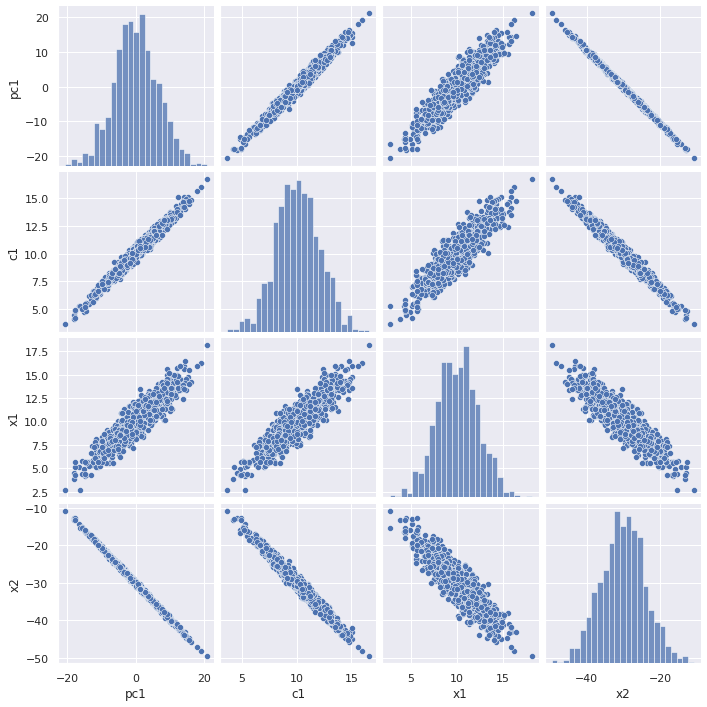

In [80]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)

# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(finalDf)

### Preguntas importantes:
1. Como se relaciona c1 con pc1?
2. Como se relaciona pc1 con x1 y x2? (Nota el signo "+ ,-" de los coeficientes que relacionan a (x1 , x2) con c1)
3. Porque es tan grande la varianza explicada del primer componente?




## Visualizacion II: Un extranno llega!
Ahora observemos que pasa si agregamos una tercera varible que no esta relacionada, es decir que no comparte un proceso con las otras variables.  
x1 y x2 comparten un proceso lineal, pero la nueva varaible x3 no!

Explained Variance:  [0.9555074]
Sum of Explained Variance:  0.9555074011749376


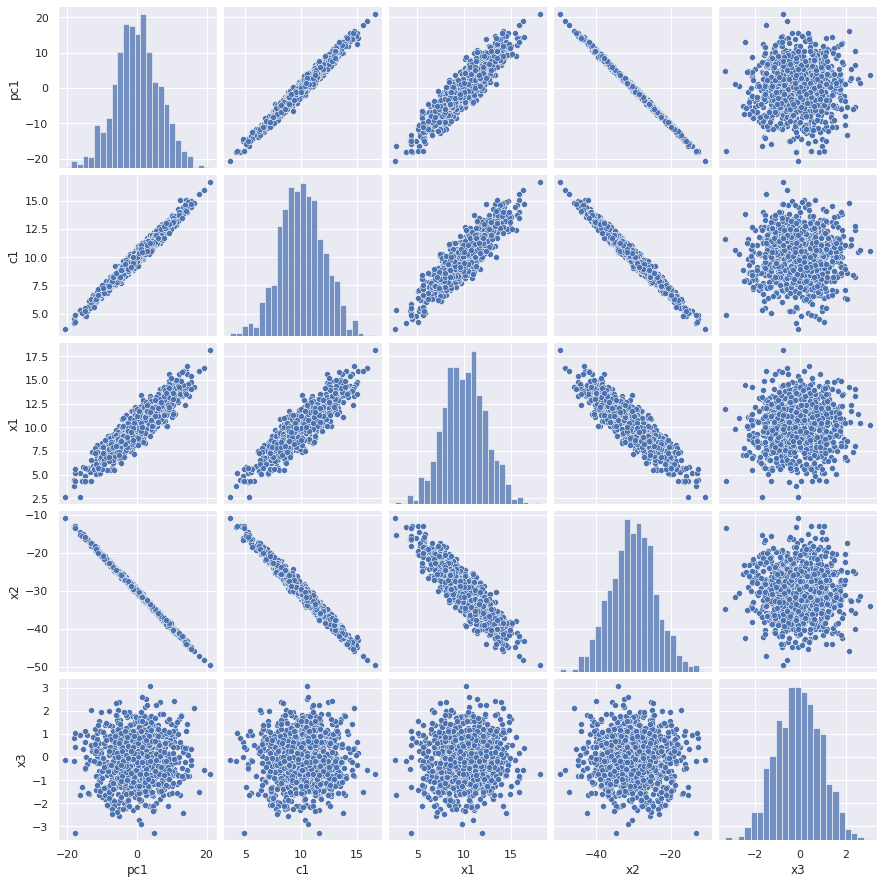

In [83]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(0,1,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(finalDf)

### Preguntas importantes:
1. Como se relaciona c1 con pc1?
2. Como se relaciona pc1 con x3?
3. Que paso con la varianza explicada por pc1 respecto a la visualizacion anterior?
4. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por x3?




## Visualizacion III: Alguien mas extranno llega!
Ahora aumentemos la magnitud de la variable x3

Explained Variance:  [0.70106079]
Sum of Explained Variance:  0.7010607898182198


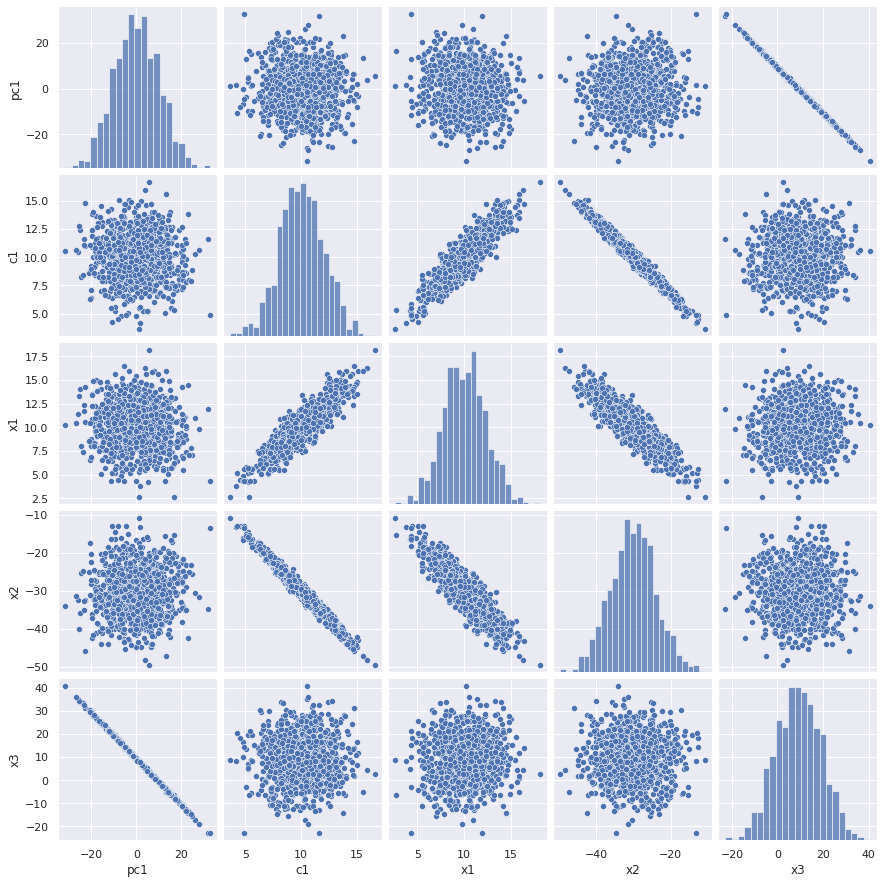

In [85]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(finalDf)

### Preguntas importantes:
1. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por la mayor varianza que presenta x3?




## Visualizacion III.1: Los extrannos son bienvenidos!
Aumentemos el numero de componentes principales a 2

Explained Variance:  [0.70106079 0.2922833 ]
Sum of Explained Variance:  0.9933440938140239


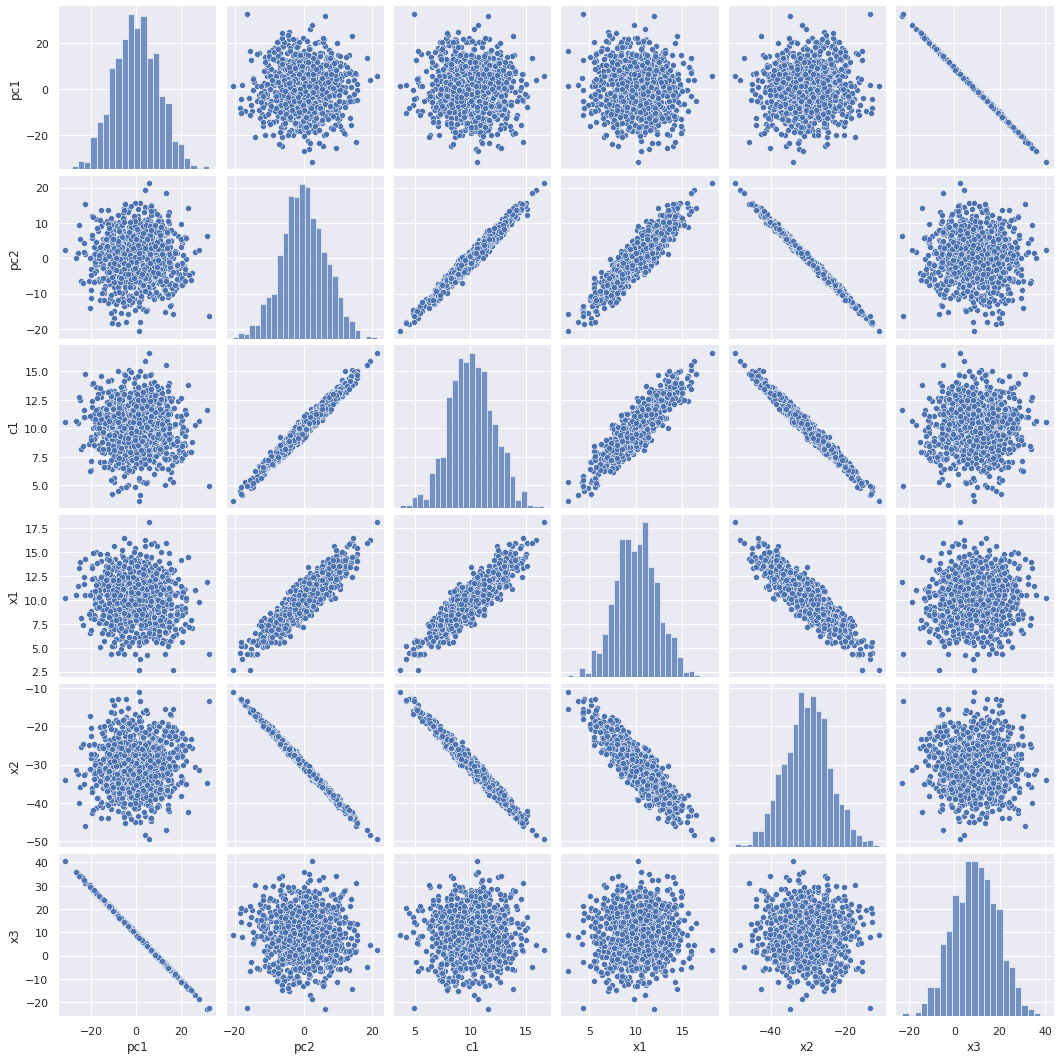

In [86]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(finalDf)

### Preguntas importantes:
1. Como se relaciona pc1 con x1, x2 & x3?
2. Como se relaciona pc2 con x1, x2 & x3?
3. Existe un orden entre las columnas y los componentes?
(Nota con que columnas/variable se relaciona pc1 y pc2)?
4. Agregar un segundo componente fue buena idea? (observa la varianza total explicada)





## Creemos una funcion para PCA


In [118]:
def pca_fun(x=pd.DataFrame(),n_c=1):
  # Define Method
  pca = PCA(n_components=n_c)
  principalComponents = pca.fit_transform(x)

  # Create names for pc
  pc_names = ['pc_{}'.format(a+1) for a in range(n_c)]

  # Compute PC
  principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_names)

  # Create visualizations
  finalDf = pd.concat([principalDf, x], axis = 1)
  print('Explained Variance: ', pca.explained_variance_ratio_)
  print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

  sns.pairplot(finalDf)


## Visualizacion IV: Correlaciones!
Veamos que pasa con el PCA cuando las variablestienen un proceso lineal que relaciona expresado como correlacion.

Matriz de Correlacion
          x1        x2
x1  1.000000  0.901158
x2  0.901158  1.000000 

Explained Variance:  [0.95058071]
Sum of Explained Variance:  0.9505807063283276


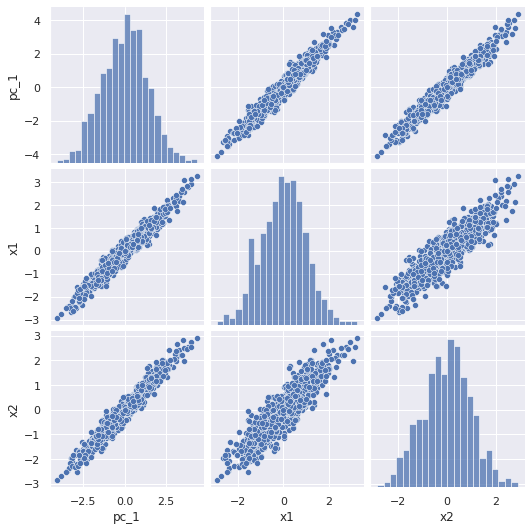

In [128]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create Variables
mean = [0, 0]
cov = np.array([[1, .9], 
                [.9, 1]]
      )
x = np.random.multivariate_normal(mean, cov, n)
x = pd.DataFrame(x, columns=['x1','x2'])
print('Matriz de Correlacion')
print(x.corr(), '\n')

pca_fun(x=x, n_c=1)

## Visualizacion IV.2: No...Correlaciones!

Veamos que pasa con el PCA cuando las variables no tienen un proceso lineal que las relaciona.


Matriz de Correlacion
          x1        x2
x1  1.000000  0.012764
x2  0.012764  1.000000 

Explained Variance:  [0.50706364]
Sum of Explained Variance:  0.507063638902168


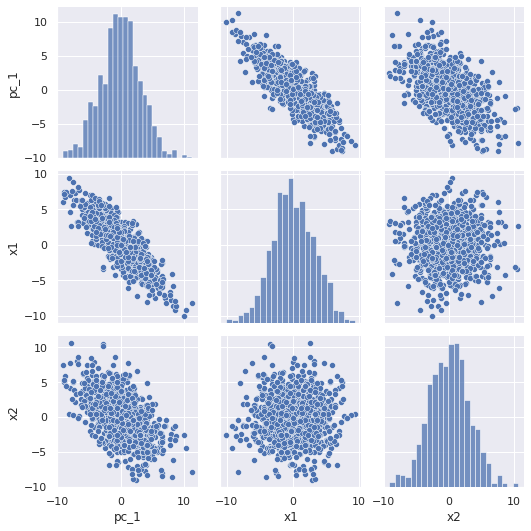

In [130]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create Variables
mean = [0, 0]
cov = np.array([[10, 0], 
                [0, 10]]
      )
x = np.random.multivariate_normal(mean, cov, n)
x = pd.DataFrame(x, columns=['x1','x2'])
print('Matriz de Correlacion')
print(x.corr(), '\n')

pca_fun(x=x, n_c=1)

### Preguntas importantes:
1. El PCA nos sirve para reducir la dimensionalidad de varibles correlacionadas? (Piensa en los escenarios posibles)
